In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.layers import Dense, SimpleRNN, Embedding, LSTM
from keras.models import Sequential

Using TensorFlow backend.


In [2]:
max_features = 10000
maxlen = 500
batch_size = 32

# Loading the Data
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)

print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

25000 train sequences
25000 test sequences
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [3]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


In [4]:
model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy', 
              metrics=['acc'])

history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 18s 914us/step - loss: 0.6025 - acc: 0.6621 - val_loss: 0.4790 - val_acc: 0.7810
Epoch 2/10
20000/20000 [==============================] - 17s 836us/step - loss: 0.3853 - acc: 0.8393 - val_loss: 0.4288 - val_acc: 0.8092
Epoch 3/10
20000/20000 [==============================] - 16s 822us/step - loss: 0.2886 - acc: 0.8895 - val_loss: 0.4441 - val_acc: 0.8020
Epoch 4/10
20000/20000 [==============================] - 19s 928us/step - loss: 0.2291 - acc: 0.9135 - val_loss: 0.3438 - val_acc: 0.8568
Epoch 5/10
20000/20000 [==============================] - 16s 825us/step - loss: 0.1917 - acc: 0.9309 - val_loss: 0.3343 - val_acc: 0.8694
Epoch 6/10
20000/20000 [==============================] - 16s 809us/step - loss: 0.1574 - acc: 0.9433 - val_loss: 0.3799 - val_acc: 0.8608
Epoch 7/10
20000/20000

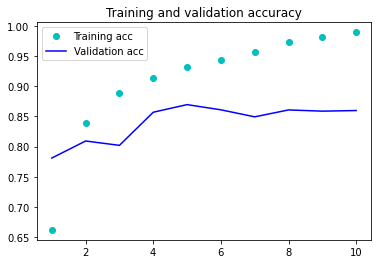

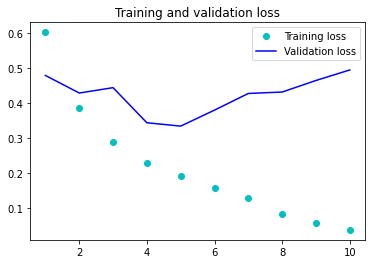

In [5]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'co', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'co', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


In [6]:
# Training using a LSTM layer

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 42s 2ms/step - loss: 0.5080 - acc: 0.7572 - val_loss: 0.3744 - val_acc: 0.8456
Epoch 2/10
20000/20000 [==============================] - 41s 2ms/step - loss: 0.2991 - acc: 0.8842 - val_loss: 0.2825 - val_acc: 0.8834
Epoch 3/10
20000/20000 [==============================] - 42s 2ms/step - loss: 0.2359 - acc: 0.9115 - val_loss: 0.2784 - val_acc: 0.8856
Epoch 4/10
20000/20000 [==============================] - 42s 2ms/step - loss: 0.1987 - acc: 0.9273 - val_loss: 0.2992 - val_acc: 0.8794
Epoch 5/10
20000/20000 [==============================] - 41s 2ms/step - loss: 0.1723 - acc: 0.9378 - val_loss: 0.3162 - val_acc: 0.8750
Epoch 6/10
20000/20000 [==============================] - 41s 2ms/step - loss: 0.1507 - acc: 0.9455 - val_loss: 0.5554 - val_acc: 0.8540
Epoch 7/10
20000/20000 [==============================] - 42s 2ms/step - loss: 0.1340 - acc: 0.9538 - val_loss: 0.3321 - val_acc:

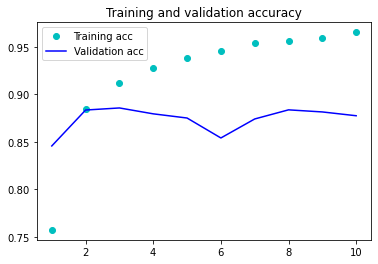

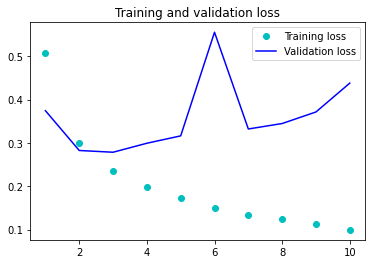

In [7]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'co', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'co', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()